In [2]:
import numpy as np
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.opflow.primitive_ops import PauliOp
from qiskit.opflow.list_ops import SummedOp
from qiskit.quantum_info import Pauli
from qiskit.algorithms import VQE


# Identification Measurement basis -- Quantum circuit 
$\newcommand{\ket}[1]{|#1\rangle}$
$\newcommand{\bra}[1]{\langle #1|}$
$\newcommand{\ketbra}[2]{\ket{#1}\!\bra{#2}}$
$\newcommand{\braket}[2]{\left\langle{#1}\left|\!{#2}\right\rangle}$

Because all of these are two qubit measurements, each of them have 4 elements. The order in which they are presented is according to the classical register corresponding to the circuits bellow. 

$$\text{Classical Register} =\{(00),(01),(10),(11) \}.$$


## Bell circuit

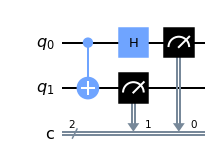

In [5]:
qc = QuantumCircuit(2,2)
qc.cnot(0,1)
qc.h(0)
qc.measure([1,0],[1,0])
qc.draw(output='mpl')

$$    Bell \mapsto 4 \hspace{.5cm} Str_4=\{II,XX,YY,ZZ\} = \{(0,0),(1,1),(2,2),(3,3)\} \\ 
\ket{\Phi_0} = \ket{00}+\ket{11} \\ \ket{\Phi_1} = \ket{00}-\ket{11}\\
   \ket{\Phi_2} = \ket{01} +\ket{10} \\ \ket{\Phi_3} = \ket{01}-\ket{10}$$

 $$    Bell \mapsto 4: \hspace{0.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ XX \mapsto [+,-,+,-]; \hspace{0.5cm} YY \mapsto [-,+,+,-] ; \hspace{0.5cm}ZZ \mapsto [+,+,-,-]\}$$
 

## $\Omega^{XX}$ circuit

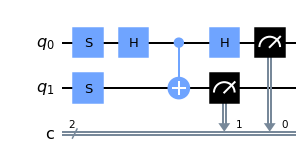

In [185]:
qc = QuantumCircuit(2, 2)
qc.s((0,1))
qc.h(0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

  
   $$ \Omega^X \mapsto 5 \hspace{.5cm} Str_5=\{II,XX,YZ,ZY\} = \{(0,0),(1,1),(2,3),(3,2)\}  \\ 
   \ket{\Omega^{XX}_0}= +\ket{00}-i\ket{01}-i\ket{10}+\ket{11} \hspace{1cm} \text{Jap} = \Omega^{XX}_2 \\
   \ket{\Omega^{XX}_1}= +\ket{00}-i\ket{01}+i\ket{10}-\ket{11} \hspace{1cm} \text{Jap} = \Omega^{XX}_0\\
   \ket{\Omega^{XX}_2}= +\ket{00}+i\ket{01}-i\ket{10}-\ket{11} \hspace{1cm} \text{Jap} = \Omega^{XX}_3\\
   \ket{\Omega^{XX}_3}= -\ket{00}-i\ket{01}-i\ket{10}-\ket{11} \hspace{1cm} \text{Jap} = \Omega^{XX}_1$$
   
   $$ \Omega^X \mapsto 5: \hspace{0.5cm} \text{Expectation values} \hspace{0.5cm} =  \{ XX \mapsto [+,-,-,+]; \hspace{0.5cm} YZ \mapsto [-,+,-,+] ; \hspace{0.5cm}ZY \mapsto [-,-,+,+]\}$$

## $\Omega^{YY}$ circuit

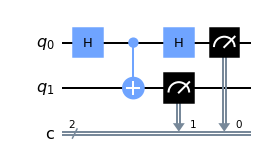

In [52]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$ \Omega^Y\mapsto 6 \hspace{.5cm}  Str_6=\{II,YY,XZ,ZX\} = \{(0,0),(2,2),(1,3),(3,1)\}  \\ 
   \ket{\Omega^{YY}_0}= +\ket{00}+\ket{01}+\ket{10}-\ket{11}  \hspace{1cm} \text{Jap} = \Omega^{YY}_2\\
   \ket{\Omega^{YY}_1}= +\ket{00}+\ket{01}-\ket{10}+\ket{11}  \hspace{1cm} \text{Jap} = \Omega^{YY}_0\\
   \ket{\Omega^{YY}_2}= +\ket{00}-\ket{01}+\ket{10}+\ket{11}  \hspace{1cm} \text{Jap} = \Omega^{YY}_3\\
   \ket{\Omega^{YY}_3}= -\ket{00}+\ket{01}+\ket{10}+\ket{11}  \hspace{1cm} \text{Jap} = \Omega^{YY}_1$$
   
 $$ \Omega^Y\mapsto 6: \hspace{.5cm}\text{Expectation values} \hspace{0.5cm} =  \{ YY \mapsto [+,-,-,+]; \hspace{0.5cm} XZ \mapsto [+,-,+,-] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$

## $\Omega^{ZZ}$ circuit

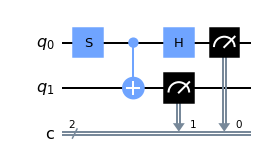

In [51]:
qc = QuantumCircuit(2, 2)
qc.s(0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$ \Omega^z\mapsto 7 \hspace{.5cm}  Str_7=\{II,ZZ,XY,YX\} = \{(0,0),(3,3),(1,2),(2,1)\}  \\ 
   \ket{\Omega^{ZZ}_{0}}= +\ket{00} - i\ket{11} \hspace{1cm} \text{Jap} = \Omega^{ZZ}_2\\
   \ket{\Omega^{ZZ}_{1}}= +\ket{00} + i\ket{11} \hspace{1cm} \text{Jap} = \Omega^{ZZ}_3\\
   \ket{\Omega^{ZZ}_{2}}= +\ket{01} + i\ket{10} \hspace{1cm} \text{Jap} = \Omega^{ZZ}_1\\
   \ket{\Omega^{ZZ}_{3}}= +\ket{00} - i\ket{10} \hspace{1cm} \text{Jap} = \Omega^{ZZ}_0$$
   
$$ \Omega^z\mapsto 7: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ ZZ \mapsto [+,+,-,-]; \hspace{0.5cm} XY \mapsto [-,+,-,+] ; \hspace{0.5cm} YX \mapsto [-,+,+,-]\}$$   

## $\chi$ circuit

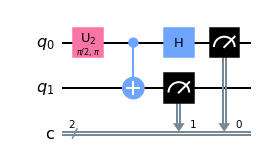

In [241]:
qc = QuantumCircuit(2, 2)
qc.u2(np.pi/2,np.pi,0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$  \chi\mapsto 8 \hspace{.5cm}  Str_8=\{II,XY,YX,ZX\} = \{(0,0),(1,2),(2,1),(3,1)\}  \\ 
   \ket{\chi_0}= -\ket{00}+\ket{01}-i\ket{10}+i\ket{11} \hspace{1cm} \text{Jap} = \chi_1\\
   \ket{\chi_1}= +\ket{00}+\ket{01}+i\ket{10}-i\ket{11} \hspace{1cm} \text{Jap} = \chi_0\\
   \ket{\chi_2}= +\ket{00}-\ket{01}+i\ket{10}+i\ket{11} \hspace{1cm} \text{Jap} = \chi_2\\
   \ket{\chi_3}= -\ket{00}+\ket{01}+i\ket{10}+i\ket{11} \hspace{1cm} \text{Jap} = \chi_3$$
   
$$ \chi\mapsto 8: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ XY \mapsto [+,-,+,-]; \hspace{0.5cm} YZ \mapsto [-,+,+,-] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$    
   

## $\Pi$ circuit

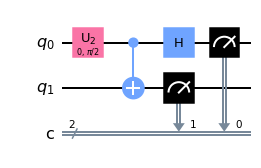

In [286]:
qc = QuantumCircuit(2, 2)
qc.u2(0,np.pi/2,0)
qc.cnot(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

 $$  \Pi \mapsto 9 \hspace{.5cm}  Str_9=\{II,YX,ZY,XZ\} = \{(0,0),(2,1),(3,2),(1,3)\}  \\ 
   \ket{\Pi_0}= +i\ket{00}-\ket{01}+i\ket{10}+\ket{11} \hspace{1cm} \text{Gab} = \Pi_3\\
   \ket{\Pi_1}= +\ket{00}+i\ket{01}-\ket{10}+i\ket{11} \hspace{1cm} \text{Gab} = \Pi_1\\
   \ket{\Pi_2}= +i\ket{00}+\ket{01}+i\ket{10}-\ket{11} \hspace{1cm} \text{Gab} = \Pi_2\\
   \ket{\Pi_3}= -\ket{00}+i\ket{01}+\ket{10}+i\ket{11} \hspace{1cm} \text{Gab} = \Pi_0
   $$
   
$$ \Pi \mapsto 9: \hspace{.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ YX \mapsto [-,+,+,-]; \hspace{0.5cm} ZY \mapsto [+,+,-,-] ; \hspace{0.5cm} XZ \mapsto [+,-,+,-]\}$$    
   
   

# Pair of Paulis with its diagonal factors 

   $$    Bell \mapsto 4: \hspace{0.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ XX \mapsto [+,-,+,-]; \hspace{0.5cm} YY \mapsto [-,+,+,-] ; \hspace{0.5cm}ZZ \mapsto [+,+,-,-]\}$$
   
   $$ \chi\mapsto 8: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ XY \mapsto [+,-,+,-]; \hspace{0.5cm} YZ \mapsto [-,+,+,-] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$ 

   $$ \Pi \mapsto 9: \hspace{.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ XZ \mapsto [+,-,+,-]; \hspace{0.5cm} YX \mapsto [-,+,+,-] ; \hspace{0.5cm} ZY \mapsto [+,+,-,-]\}$$    

  $$ \Omega^X \mapsto 5: \hspace{0.5cm} \text{Expectation values} \hspace{0.2cm} =  \{ YZ \mapsto [-,+,-,+]; \hspace{0.5cm} XX \mapsto [+,-,-,+] ; \hspace{0.5cm}ZY \mapsto [-,-,+,+]\}$$
  
   $$ \Omega^Y\mapsto 6: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{XZ \mapsto [+,-,+,-]; \hspace{0.5cm} YY \mapsto [+,-,-,+] ; \hspace{0.5cm} ZX \mapsto [+,+,-,-]\}$$
   
   $$ \Omega^z\mapsto 7: \hspace{.5cm}\text{Expectation values} \hspace{0.2cm} =  \{ XY \mapsto [-,+,-,+]; \hspace{0.5cm} YX \mapsto [-,+,+,-] ; \hspace{0.5cm} ZZ \mapsto [+,+,-,-]\}$$
   
